In [24]:
import numpy as np
import astropy.units as u
import pygadgetreader as pyg
import matplotlib.pyplot as plt

In [86]:
class CenterOfMass:

    def __init__(self,ptype):
        # Input:  Ptype is an integer 1,2 or 3 where 1, 2, 3 specify if you want disk, bulge or halo
        # read in the snapshot using pygadget reader 
        # and store positions and velocities and masses of the given particle type as arrays
        # you will need an if statement here to specify what gets loaded using pygadget reader
         
        if ptype == 1:
            a = "disk"
        elif ptype == 2:
            a = "bulge"
        elif ptype == 3:
            a = "dm"
        else:
            print ("invalid input")
        
        self.pos = pyg.readsnap("../sims/MW_1M_db_010", "pos", a)
        self.vel = pyg.readsnap("../sims/MW_1M_db_010",'vel', a)
        self.mass = pyg.readsnap("../sims/MW_1M_db_010", "mass", a)
        #properties of the object
        
        
    # EXAMPLE FUNCTION 
    def total_mass(self):
        # function that RETURNS THE TOTAL MASS OF THE DISK 
        # output: Mass is units of Msun
        # self allows you to call functions anytime without defining it again
        #Note: you can add other keyword arguments into the function, but 'self' must be first                         
        
        return np.sum(self.mass)*1e10
    
    
    def total_mass_inr(self, k):
        #function that RETURNS THE MASS OF THE DISK WITHIN A GIVEN RADIUS
        # we are using k to be able to ask for any radius that we want 
        # the function  np.where  is useful here.  
        
        xpos= self.pos[:,0]
    
        ypos= self.pos[:,1]
    
        zpos= self.pos[:,2]

        r_disk = np.sqrt(xpos**2 + ypos**2 + zpos**2)
        #print (xpos[0], ypos[0], zpos[0], r_disk[0]) 
        

        rindex = np.where(r_disk<k)[0]   
        # [0] forces the array into one columm
        #print (r_disk[rindex[0]]) # prints the value of r_disk for the first particle that has r< 20  
        #print (rindex[0]) # prints the index in the r_disk array of the first particle that has r < 20  
        #print (np.max(r_disk[rindex])) #prints the max value of the r_disk array that should have all particles with r < 20
        # check that max should be less than 20 
        
        mass_rcut = self.mass[rindex] 
        #returns the mass withing the given radius
        
        
        
        return np.sum(mass_rcut)*1e10
    
    def mass_profile(self, maxradius, interval=2):
        #the inputs are: the maximum radius we want to consider
        #the interval takes in how we want divide the inteval [0,maxradius] (the number of steps)
        #outputs: the mass contained within the specified radius
    
        
        r = np.arange(0, maxradius, interval)
        #we're creating a list of r. starts at 0, goes to maxradius & it takes in the subdivisions of the interval
        
        mass = [self.total_mass_inr(i) for i in r]
        #we call the funtion that returns the mass contained within a given radius and it sums it up from 0 to maxradius.
        
        return mass,r
    
    def COMdefine(self, a, b, c, m):
        #This function will give back the center of mass of the galaxy using velocity or postionf info.
        #it takes 4 inputs: 3 components of the position or velocity vector, and the total mass.
        #Note that mx is the same as m, since all have the same mass
        
        # Xcom= sum(x*massx)/sum(totalmass)
        #this is the function we need.
        #n stands fot numerator and d stands for denominator
        
        na = np.sum(a*m)
        da = np.sum(m)
        acom = na/da
        
        nb = np.sum(b*m)
        db = np.sum(m)
        bcom = nb/db
        
        nc = np.sum(c*m)
        dc = np.sum(m)
        ccom = nc/dc
        
        return acom, bcom, ccom
    
    #velocity profile
    
    def vel_disk(self):
        #returns the total velocity 
        return np.sum(self.vel)
    #print(vel_disk)
    
    def vel_rad(self, k):
        #returns the velocity of the particles at a given radius
   
        #function that RETURNS THE MASS OF THE DISK WITHIN A GIVEN RADIUS
        # we are using k to be able to ask for any radius that we want 
        # the function  np.where  is useful here.  
        
        xpos= self.pos[:,0]
    
        ypos= self.pos[:,1]
    
        zpos= self.pos[:,2]

        r_disk = np.sqrt(xpos**2 + ypos**2 + zpos**2)
        #print (xpos[0], ypos[0], zpos[0], r_disk[0])
        
        #SHOULD I CHANGE R_DISK TO R_PART?

        rindex = np.where(r_disk<k)[0]
        #[0] forces the array into one column
       
        vel_rcut = self.vel[rindex] 
        #returns the velocity withing the given radius
        
        return np.sum(vel_rcut)
    #What are the units?
    
    def vel_profile(self, maxradius, interval=2):
    #return the velocity within a max radius. 
    #Same interval as for the mass profile just for now
    #need to create a list for r
        
        r= np.arange(0, maxradius, interval)
        
        vel= [self.vel_rad(i) for i in r] 
        #self. to call the previous function with all the properties from the class.
        #"for i in r" kind of a for loop.  we have r to be a list, so "for i in r" makes the prev. function take in
        #and add all the values from from our list r 
        
        return r, vel
    

    
        
    
        
        
        


In [87]:
MWCOM = CenterOfMass(1)
MWCOM_BULGE= CenterOfMass(2)
MWCOM_HALO = CenterOfMass(3) 
#Center of mass is the name of the class we defined at the begining.
#We define the function MWCOM to be the class Center of Mass with the properties of DISK

Returning DISK  Positions
Returning DISK  Velocities
Returning DISK  Mass
Returning BULGE Positions
Returning BULGE Velocities
Returning BULGE Mass
Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass


In [88]:
a = np.array([1,1,-1,-1])
b = np.array([1,1,1,1])
c = np.array([1,1,1,1])
m = np.array([2,2,2,2])
#Creating a generic array for the 3 vector components and mass we would need to make the calculation for the center of mass

In [89]:
print (a[0])
#testing that our array works

1


In [90]:
ac, bc, cc = MWCOM.COMdefine(a, b, c, m)
#definig the three outputs we can get from or vcenter of mass function
#MWCOM. is what allow us to call all the properties of the class into our function

In [91]:
ac
#This is a test. Getting the result of the center of mass for component a. We already new what the value should be

0.0

In [92]:
#make velocity profile
#create a plot that returns the avg velocity within a given radius. 
#average velocity in r
#you have to create a new function, work on calling functions 
#if enough time play with COMdefine and try to return the real center of mass from the simulation, how would you call the postions, and velocity of the disk?

In [93]:
#testing velocity profile
np.sum(MWCOM.vel)

21451.875

In [94]:
MWCOM.vel_disk()

21451.875

In [95]:
MWCOM.vel_rad(15)

16801.281

In [96]:
MWCOM.vel_rad(47)

21451.875

In [98]:
r, v = MWCOM.vel_profile(40) 
rb, vb = MWCOM_BULGE.vel_profile(40)
rdm, vdm = MWCOM_HALO.vel_profile(40)




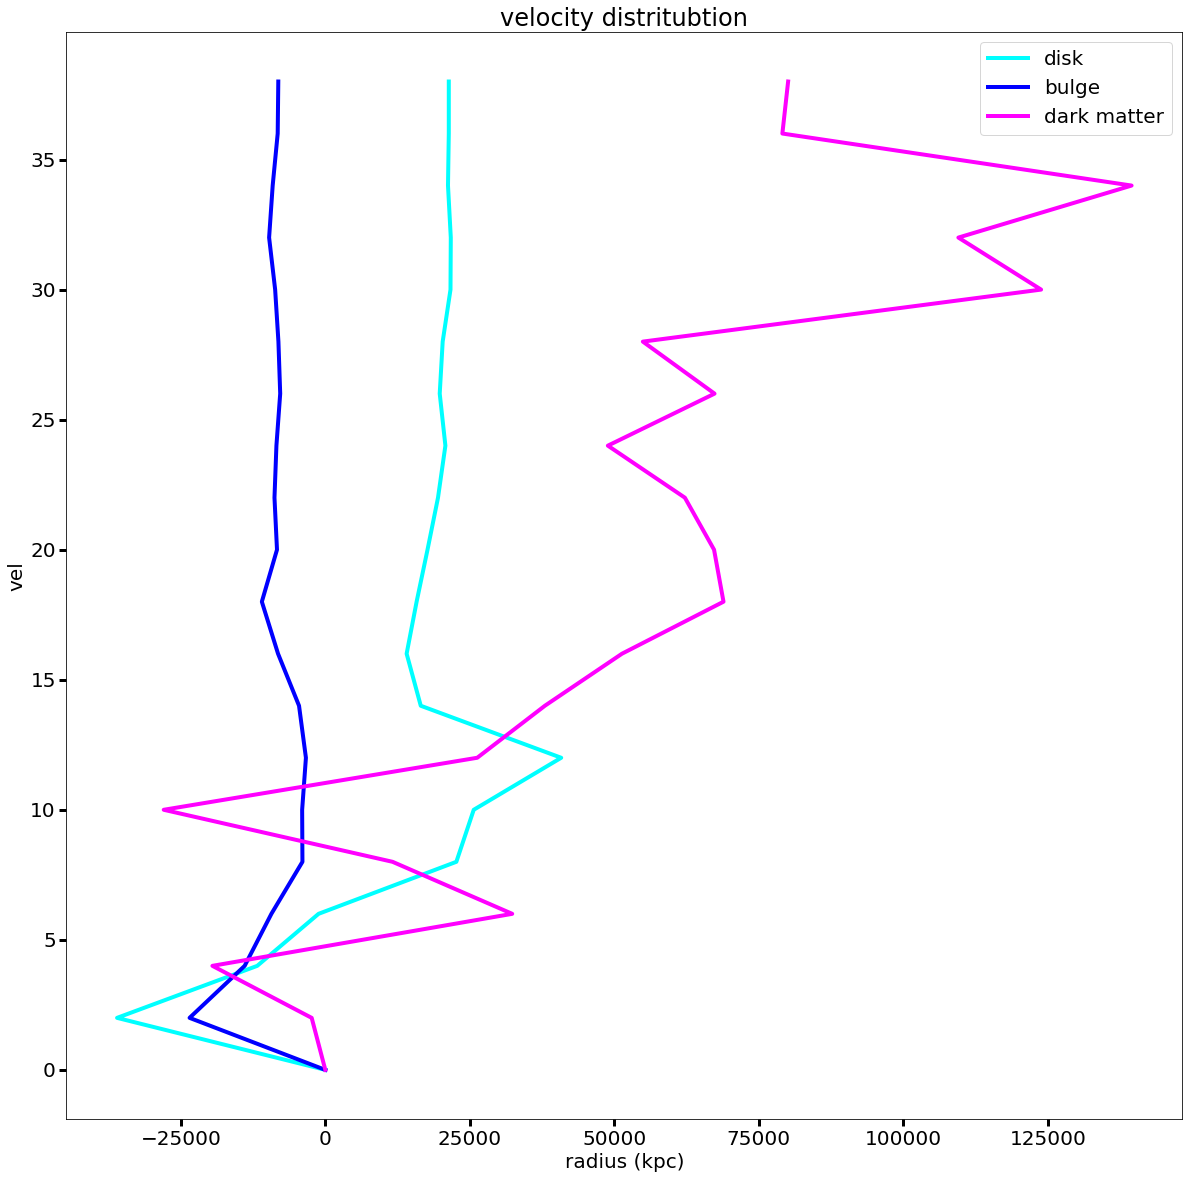

In [114]:
fig = plt.figure(figsize=(20,20))
plt.plot(r,v, label="disk", lw=4, linestyle='-', color='cyan')
plt.plot(rb, vb, label="bulge", lw=4, linestyle='-', color='blue')
plt.plot(rdm, vdm, label="dark matter", lw=4, linestyle='-', color='magenta')
plt.title('velocity distritubtion')
plt.axis()
plt.ylabel('vel') 
plt.xlabel('radius (kpc)')
plt.legend()
plt.rcParams.update({'font.size': 20})
plt.tick_params(which = 'both', width = 3)
plt.tick_params(which = 'both', length = 7)